Biography Domain

In [1]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Kishor' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import wikipedia
import json
from bs4 import BeautifulSoup 
import requests
import re
import random
import ast
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sys import maxsize

In [3]:
INT_MAX = maxsize

In [4]:
list1=[
       "https://en.wikipedia.org/wiki/Special:WhatLinksHere/Biography",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Attila",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=August+Derleth",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Miss+Marple",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Amathus",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Autobiography",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Christopher+Marlowe",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Dracula",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Historiography",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Hesiod",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Hero",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Livy",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Liber+Pontificalis",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Library+of+Congress+Classification",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Musicology",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Murray+Gell-Mann",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Michelangelo",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Nonfiction",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Roy+Jenkins",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Samuel+Butler+%28poet%29",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=40s"


]

In [5]:
biography = {}
for item in list1:
    url = item
    data  = requests.get(url).text 
    soup = BeautifulSoup(data,"html5lib")
    name = soup.find('title')
    name = name.string
    start= '"'
    end = '"'
    title= (name.split(start))[1].split(end)[0]
    articlelinks = []
    paras = soup.find_all('ul',{"id": "mw-whatlinkshere-list"})
    for para in paras:
        links = para.find_all('a')
        for link in links:
            data = re.findall('href="/wiki/', str(link))
            if len(data)!=0:
                x = re.findall("\[*\]", str(link.string))
                if len(x)==0:
                    articlelinks.append(link.string)
    biography[title]=articlelinks
biography
    

{'Biography': ['Attila',
  'August Derleth',
  'Miss Marple',
  'Amathus',
  'Autobiography',
  'Talk:Biography',
  'Christopher Marlowe',
  'Dracula',
  'Historiography',
  'Hesiod',
  'Hero',
  'Livy',
  'Liber Pontificalis',
  'Library of Congress Classification',
  'Outline of literature',
  'Musicology',
  'Murray Gell-Mann',
  'Michelangelo',
  'Nonfiction',
  'Plutarch',
  'Roy Jenkins',
  'Samuel Butler (poet)',
  '40s',
  '110s',
  '120s',
  'AD 46',
  'AD 119',
  'AD 127',
  'Aeneid',
  'Suetonius',
  'Museum',
  'The Illuminatus! Trilogy',
  'Historical fiction',
  'Han dynasty',
  'Sharon Tate',
  'L. Sprague de Camp',
  'Talk:Catherine the Great',
  'Tonya Harding',
  "Children's literature",
  'Timeline',
  'Akhnaten (opera)',
  'Sax Rohmer',
  'Music history',
  'Wikipedia:WikiProject Biography',
  'Pope Gelasius I',
  'James Boswell',
  'List of biographers',
  'Eric Bloodaxe',
  'A Brief History of Time',
  'User:Mariposa'],
 'Attila': ['Attila',
  'Alessandro Algardi'

In [6]:
matrix1 = [[0 for x in range(20)] for x in range(20)]
for i in range(20):
    for j in range(20):
        matrix1[i][j] = 0

In [7]:
matrix = [[0 for x in range(20)] for x in range(20)]
for i in range(20):
    for j in range(20):
        matrix[i][j] = 1000


In [8]:
biography_list = list(biography)
#count=0
j=0
k=0
#l=0
for x in range(20):
    for y in range(20):
        #print("\niteration")
        #print(x)
        #print("j=")
        #print(x)
        #print(" k=")
        #print(y)
        list1=biography[biography_list[x]]
        list2=biography[biography_list[y]]
        #print(list1)
        #print(list2)
        a=len(list1)
        b=len(list2)
        count=0
        for m in range(a):
            l=0
            for n in range(b):
                #print(count)
                if(list2[n]==list1[m]):
                    #print(list2[n]+ "\t" +list1[m])
                    count+=1
                    #print(count)
        #print(count)
        if(count>5):
            matrix[x][y]=count
            matrix1[x][y]=count
            print(biography_list[x] + " and " + biography_list[y])
            #print(x)
            #print(y)
            #print("\n")
#print(matrix)
print(matrix1)

Biography and Biography
Attila and Attila
August Derleth and August Derleth
Miss Marple and Miss Marple
Amathus and Amathus
Autobiography and Autobiography
Christopher Marlowe and Christopher Marlowe
Dracula and Dracula
Historiography and Historiography
Hesiod and Hesiod
Hesiod and Livy
Hero and Hero
Livy and Hesiod
Livy and Livy
Liber Pontificalis and Liber Pontificalis
Library of Congress Classification and Library of Congress Classification
Musicology and Musicology
Murray Gell-Mann and Murray Gell-Mann
Michelangelo and Michelangelo
Nonfiction and Nonfiction
Roy Jenkins and Roy Jenkins
Samuel Butler (poet) and Samuel Butler (poet)
[[50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0

0   Biography
1   Attila
2   August Derleth
3   Miss Marple
4   Amathus
5   Autobiography
6   Christopher Marlowe
7   Dracula
8   Historiography
9   Hesiod
10   Hero
11   Livy
12   Liber Pontificalis
13   Library of Congress Classification
14   Musicology
15   Murray Gell-Mann
16   Michelangelo
17   Nonfiction
18   Roy Jenkins
19   Samuel Butler (poet)
20   40s


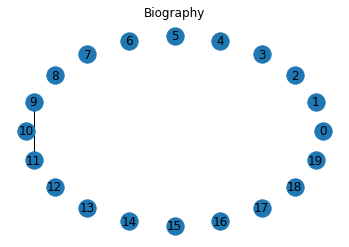

In [9]:
for index,article in enumerate(biography_list):
    print(index," ",article)
df = pd.DataFrame(data=matrix1)
plt.figure()
plt.title("Biography")
G = nx.OrderedGraph(df.values)
nx.draw_circular(G, with_labels=True)


In [10]:
for i,j in biography.items():
    print(i)

Biography
Attila
August Derleth
Miss Marple
Amathus
Autobiography
Christopher Marlowe
Dracula
Historiography
Hesiod
Hero
Livy
Liber Pontificalis
Library of Congress Classification
Musicology
Murray Gell-Mann
Michelangelo
Nonfiction
Roy Jenkins
Samuel Butler (poet)
40s


In [11]:
tree = [[0 for x in range(20)] for x in range(20)]
for i in range(20):
    for j in range(20):
        tree[i][j] = 0

In [12]:

from sys import maxsize
INT_MAX = maxsize
V = 20
def isValidEdge(u, v, inMST):
    if u == v:
        return False
    if inMST[u] == False and inMST[v] == False:
        return False
    elif inMST[u] == True and inMST[v] == True:
        return False
    return True
 
def primMST(cost):
    inMST = [False] * V
    inMST[0] = True
    edge_count = 0
    mincost = 0
    while edge_count < V - 1:
 
        # Find minimum weight valid edge.
        minn = INT_MAX
        a = -1
        b = -1
        for i in range(V):
            for j in range(V):
                if cost[i][j] < minn:
                    if isValidEdge(i, j, inMST):
                        minn = cost[i][j]
                        a = i
                        b = j
 
        if a != -1 and b != -1:
            print("Edge %d: (%d, %d) cost: %d" %
                 (edge_count, a, b, minn))
            tree[a][b]=minn
            edge_count += 1
            mincost += minn
            inMST[b] = inMST[a] = True
 
    print("Minimum cost = %d" % mincost)

if __name__ == "__main__":

    primMST(matrix)
# sanjeev2552

Edge 0: (0, 1) cost: 1000
Edge 1: (0, 2) cost: 1000
Edge 2: (0, 3) cost: 1000
Edge 3: (0, 4) cost: 1000
Edge 4: (0, 5) cost: 1000
Edge 5: (0, 6) cost: 1000
Edge 6: (0, 7) cost: 1000
Edge 7: (0, 8) cost: 1000
Edge 8: (0, 9) cost: 1000
Edge 9: (9, 11) cost: 6
Edge 10: (0, 10) cost: 1000
Edge 11: (0, 12) cost: 1000
Edge 12: (0, 13) cost: 1000
Edge 13: (0, 14) cost: 1000
Edge 14: (0, 15) cost: 1000
Edge 15: (0, 16) cost: 1000
Edge 16: (0, 17) cost: 1000
Edge 17: (0, 18) cost: 1000
Edge 18: (0, 19) cost: 1000
Minimum cost = 18006


In [13]:
print(tree)

[[0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

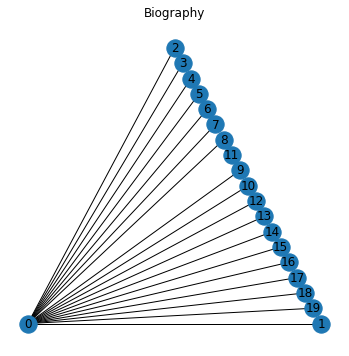

In [15]:
df1 = pd.DataFrame(data=tree)
f=plt.figure(figsize=(6,6))
plt.title("Biography")
G1 = nx.OrderedGraph(df1.values)
nx.draw_planar(G1, with_labels=True)